In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
data=pd.read_csv("C:/Users/M.Gopal/Downloads/Swiggy Dataset - Sheet1.csv")

In [3]:
data.describe()

,favorite_count,followers_count,friends_count,retweet_count
count,16712.000000,1.671200e+04,16712.000000,16712.000000
mean,0.554691,3.156743e+03,384.175383,0.142592
std,8.973908,9.161054e+04,1652.475629,3.890990
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,9.000000e+00,48.000000,0.000000
50%,0.000000,4.300000e+01,139.000000,0.000000
75%,0.000000,1.950000e+02,376.000000,0.000000
max,916.000000,6.823332e+06,155340.000000,487.000000


In [4]:
data.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"61,959,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"143,284,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"143,284,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"830,340,000,000,000,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"143,284,383"


In [5]:
data.tail()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
16707,7/11/2019 12:13,0,0,2,@SwiggyCares they said as delivery box is not ...,0,False,UmmeMohammad18,"16,708","1,144,990,000,000,000,000"
16708,7/11/2019 12:12,0,106,146,"@swiggy_in Deliver to karta nahi, install kyo ...",0,False,Desi_Life1,"16,709","1,039,410,000,000,000,000"
16709,7/11/2019 12:11,0,91,248,@swiggy_in thanks for spilling my drink. I wai...,0,False,Pinks_Forever_,"16,710","1,700,914,573"
16710,7/11/2019 12:11,0,0,2,@SwiggyCares hello there i use swigggy regular...,0,False,UmmeMohammad18,"16,711","1,144,990,000,000,000,000"
16711,7/11/2019 12:09,0,54,163,@Being_Humor @ZomatoIN @swiggy_in can you help...,0,False,TejasShelar2498,"16,712","717,511,000,000,000,000"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        14384 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  object
 9   user_id          16712 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [7]:
data.shape

(16712, 10)

In [8]:
data.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'],
      dtype='object')

In [9]:
data.nunique()

date               11097
favorite_count        52
followers_count     1524
friends_count       1505
full_text          16703
retweet_count         26
retweeted              1
screen_name         8617
tweet_id           16712
user_id             8539
dtype: int64

In [10]:
data.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [11]:
#null values found in retweeted columns 
mode = data['retweeted'].mode().values[0]
data['retweeted']= data['retweeted'].replace(np.nan, mode)
  
data.isnull().sum()

date               0
favorite_count     0
followers_count    0
friends_count      0
full_text          0
retweet_count      0
retweeted          0
screen_name        0
tweet_id           0
user_id            0
dtype: int64

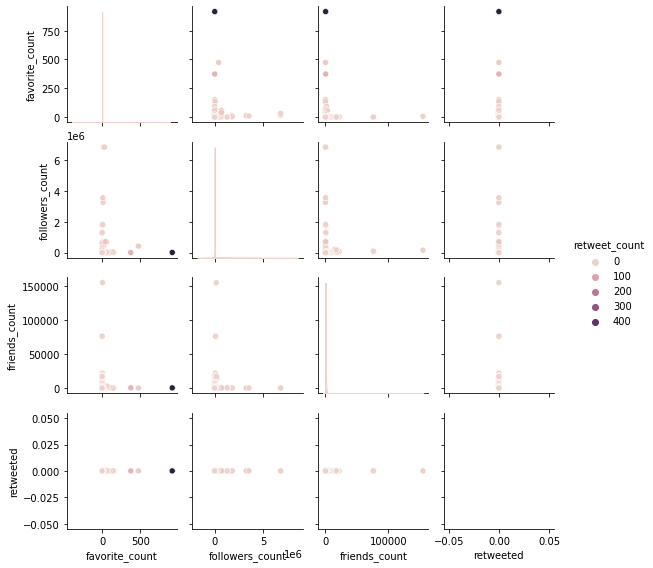

In [12]:
sns.pairplot(data, hue='retweet_count', height=2)

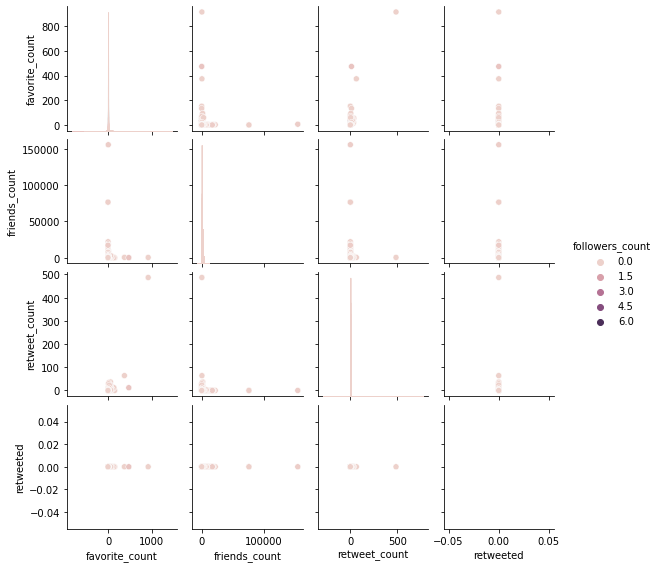

In [13]:
sns.pairplot(data, hue='followers_count', height=2)

In [14]:
# Converting the "date" column from "object" to "datetime"
data['date']=pd.to_datetime(data['date'])

In [15]:
# Extracting the date from datetime as a new Attribute as M
data['DATE']=data['date'].dt.to_period('D')
data['DATE']

0        2019-07-18
1        2019-07-18
2        2019-07-18
3        2019-07-18
4        2019-07-18
            ...    
16707    2019-07-11
16708    2019-07-11
16709    2019-07-11
16710    2019-07-11
16711    2019-07-11
Name: DATE, Length: 16712, dtype: period[D]

In [16]:
data['DATE'].min(),data['DATE'].max()

(Period('2019-06-01', 'D'), Period('2019-07-18', 'D'))

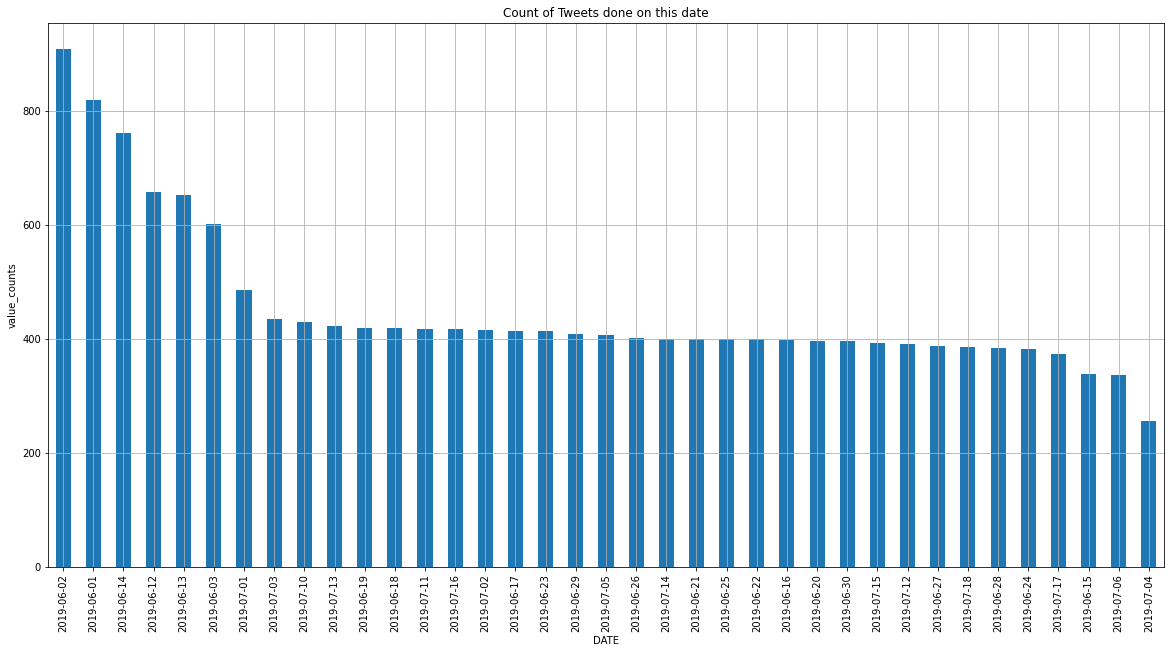

In [17]:
data.DATE.value_counts().plot.bar(figsize=(20,10),title='Count of Tweets done on this date')
plt.xlabel('DATE')
plt.ylabel('value_counts')
plt.xticks(rotation=90)
plt.grid()

In [18]:
#most of the tweets were done on 2019-06-02
DATE_COUNT=data['DATE'].value_counts()
df_reg_count=pd.DataFrame(DATE_COUNT)
df_reg_count.rename({'DATE':'DATE_COUNT'},axis='columns',inplace=True)
df_reg_count.sort_index(ascending=True,inplace=True)
df_reg_count.head()

,DATE_COUNT
2019-06-01,818
2019-06-02,908
2019-06-03,602
2019-06-12,657
2019-06-13,652


<AxesSubplot:>

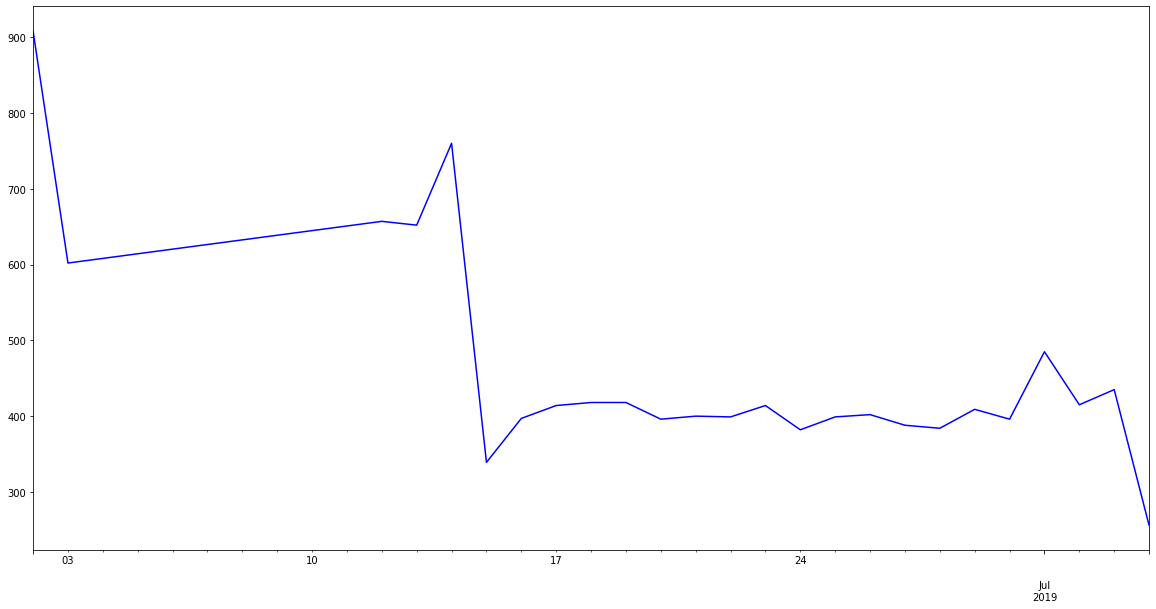

In [19]:
# To understand the trend in the data
df_reg_count['DATE_COUNT'].plot(xlim=['2019-06-02','2019-7-04'],figsize=(20,10),color='b')

In [20]:
data['retweeted'].value_counts()

False    16712
Name: retweeted, dtype: int64

In [21]:
data[data['retweeted']==False]['retweet_count']

0        0
1        0
2        0
3        0
4        0
        ..
16707    0
16708    0
16709    0
16710    0
16711    0
Name: retweet_count, Length: 16712, dtype: int64

In [22]:
data[(data['retweeted']==False) & (data['retweet_count']>=1)]

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id,DATE
9,2019-07-18 22:17:00,0,102,129,I hope you hire educated professionals @swiggy...,1,False,Bharatbbhushn,10,"143,284,383",2019-07-18
40,2019-07-18 20:23:00,0,11,188,@SwiggyCares I have already shared with you bu...,1,False,JRPalai,41,"435,769,930",2019-07-18
98,2019-07-18 18:34:00,0,213,275,@babagolmaal @swiggy @SwiggyCares @UfterYou @A...,1,False,imayank_kothari,99,"2,623,291,070",2019-07-18
122,2019-07-18 18:05:00,1,31,430,@SwiggyCares and @Uber_India @Olacabs please h...,3,False,AmarnathGowtham,123,"875,359,000,000,000,000",2019-07-18
159,2019-07-18 17:21:00,10,3510,1991,Forgot to tweet earlier. \n \n My breakfast to...,1,False,saurabh,160,"6,325",2019-07-18
...,...,...,...,...,...,...,...,...,...,...,...
16653,2019-07-11 13:37:00,0,112,108,@SwiggyCares @azzythejazzy Here's the proof of...,1,False,madan_ashish,"16,654","845,840,786",2019-07-11
16660,2019-07-11 13:26:00,0,10,116,@newproblem @UfterYou @ZomatoIN @Zomato @Zomat...,1,False,deepakwadhawan,"16,661","1,022,850,000,000,000,000",2019-07-11
16679,2019-07-11 13:07:00,5,366,85,"Cheated by @swiggy for 500th time, I guess. EX...",4,False,babagolmaal,"16,680","3,240,109,257",2019-07-11
16696,2019-07-11 12:43:00,2,6,24,Terrible product. Thank God that 4-year-old gi...,1,False,PrabhakaranBha2,"16,697","3,150,829,422",2019-07-11


In [23]:
 #the data that from "retweeted" and "retweet_count" that some customers have retweeted but its showing "False" which need to be changed to "True".

In [24]:
df_tweet=data.drop(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text','screen_name', 'tweet_id',
       'user_id'],axis=1)
df_tweet


,retweet_count,retweeted,DATE
0,0,False,2019-07-18
1,0,False,2019-07-18
2,0,False,2019-07-18
3,0,False,2019-07-18
4,0,False,2019-07-18
...,...,...,...
16707,0,False,2019-07-11
16708,0,False,2019-07-11
16709,0,False,2019-07-11
16710,0,False,2019-07-11


In [25]:
# Firstly replacing all the Retweet that are "False" but showing retweet_count more than and equal to 0 to "True"
df_tweet[(df_tweet['retweeted']==False) & (df_tweet['retweet_count']>=1)]=True

In [26]:
# Treating the Nulls

# When retweeted contains nulls and retweet_count is equal to 0 then its "false"
df_tweet[(df_tweet['retweeted'].isnull()) & (df_tweet['retweet_count']==0)]=False

# When retweeted contains nulls and retweet_count is more than or equal to 1 then its "True"
df_tweet[(df_tweet['retweeted'].isnull()) & (df_tweet['retweet_count']>=1)]=True

In [27]:
df_tweet['retweeted'].value_counts()

False    15734
True       978
Name: retweeted, dtype: int64

In [28]:
data.drop(['retweeted','DATE'],axis=1,inplace=True)
df_tweet.drop(['retweet_count'],axis=1,inplace=True)

In [29]:
df=pd.concat([data,df_tweet],axis=1)
df.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,screen_name,tweet_id,user_id,retweeted,DATE
0,2019-07-18 22:47:00,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,syamantak1,1,"61,959,419",False,2019-07-18
1,2019-07-18 22:43:00,0,102,129,@SwiggyCares I hope so.,0,Bharatbbhushn,2,"143,284,383",False,2019-07-18
2,2019-07-18 22:37:00,0,102,129,@SwiggyCares I think you have the order detail...,0,Bharatbbhushn,3,"143,284,383",False,2019-07-18
3,2019-07-18 22:35:00,0,13,16,"@swiggy_in People are complaining here also, i...",0,taifkhalid01,4,"830,340,000,000,000,000",False,2019-07-18
4,2019-07-18 22:25:00,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,Bharatbbhushn,5,"143,284,383",False,2019-07-18


In [30]:
df[df['followers_count']==df['followers_count'].max()]['screen_name']
#'htTweets' has the most numbers of followers in tweeter

11480    htTweets
Name: screen_name, dtype: object

In [31]:
df[df['followers_count']==df['followers_count'].min()]['screen_name']

6             PaaniDaana
90        Sharad86860674
102         Yash78600509
110       Sharad86860674
114       Sharad86860674
              ...       
16640    KomalAg46786747
16646    Prateek11818470
16682          vky8azaad
16707     UmmeMohammad18
16710     UmmeMohammad18
Name: screen_name, Length: 868, dtype: object

In [32]:
df[df['friends_count']==df['friends_count'].max()]['screen_name']
#"flywithsid" have the most friends in tweeter

2165    flywithsid
Name: screen_name, dtype: object

In [33]:
df[df['friends_count']==df['friends_count'].min()]['screen_name']

102        Yash78600509
125        Yash78600509
167        Yash78600509
283       Kunal19290880
336      Ashish64243645
              ...      
16406     TharaniAnshul
16408     TharaniAnshul
16485          Arungm16
16516     PagariaAditya
16517     PagariaAditya
Name: screen_name, Length: 334, dtype: object

In [34]:
df['screen_name'].value_counts().head(3)

SandipThink        71
SwiggyCares        70
Vineeta75481990    53
Name: screen_name, dtype: int64

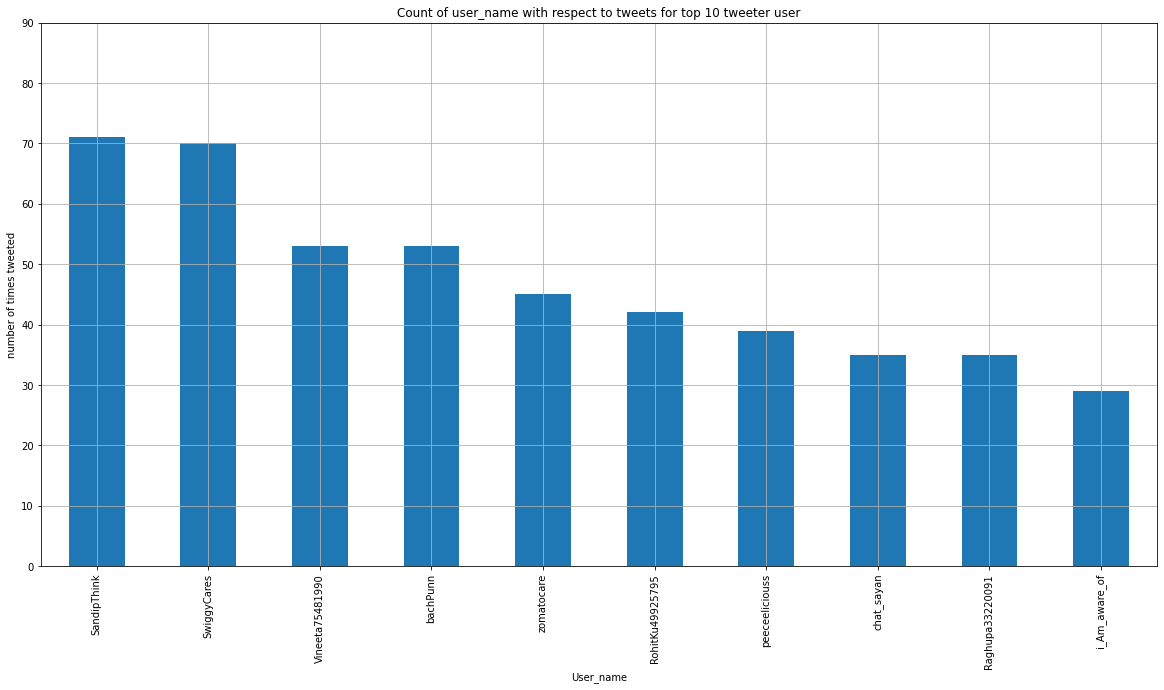

In [35]:
### Count of user_name with respect to tweets
plt.figure(figsize = (20,10))
df.groupby(['screen_name'])['screen_name'].size().sort_values(ascending= False).head(10).plot(kind='bar')
plt.xlabel('User_name')
plt.xticks(rotation = 90)
plt.ylim(0,90)
plt.ylabel('number of times tweeted')
plt.title('Count of user_name with respect to tweets for top 10 tweeter user')
plt.grid()

In [36]:
for i in df[df['screen_name']=='SandipThink']['full_text'].head(7):
    print(i)

@SwiggyCares @MirrorofFuture1 Have already stopped using them
@mesinghshubham @SwiggyCares Due to this I have stopped using them
@SwiggyCares @JainAmitTS They just give copy paste replies to everything without providing a resolution
@SwiggyCares @mesinghshubham Don't expect good services from them.. they will just assure you of improving services in future and will keep repeating mistakes
@SwiggyCares I'm not initiating any dm
@SwiggyCares I have already shared the details many times during last month... I do not have patience nor the time to share details again and again for your convenience
@SwiggyCares @shadysachin Don't expect good services from them... They contradict their own statements and customer has to suffer for their poor services.. better to look for alternatives


In [37]:
df_new=df.drop(['date', 'favorite_count', 'followers_count', 'friends_count','retweet_count', 'retweeted', 'screen_name', 'tweet_id','user_id'],axis=1)
df_new.head(5)

,full_text,DATE
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18
1,@SwiggyCares I hope so.,2019-07-18
2,@SwiggyCares I think you have the order detail...,2019-07-18
3,"@swiggy_in People are complaining here also, i...",2019-07-18
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18


In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
corpus = []
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['full_text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review) # Appending to corpus

In [40]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_new['polarity_score'] = df_new['full_text'].apply(lambda x : polarity(str(x)))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df_new['polarity'] = df_new['polarity_score'].map(lambda x: sentiment(x))

In [41]:
stop_words = stopwords.words('english')
def get_data(df_new,senti):
    s_df = df_new[df_new['polarity']==senti].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_df)):
        review = re.sub('[^a-zA-Z]',' ',data['full_text'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        s_corpus.append(review)
    return s_corpus

p_corpus = get_data(df_new,'positive')
p_corpus=pd.DataFrame(p_corpus)

n_corpus = get_data(df_new,'negative')
n_corpus=pd.DataFrame(n_corpus)

nt_corpus = get_data(df_new,'neutral')
nt_corpus=pd.DataFrame(nt_corpus)

In [42]:
p_corpus.shape,n_corpus.shape,nt_corpus.shape

((5461, 1), (5462, 1), (5789, 1))

In [43]:
df_new.drop('polarity_score',axis=1,inplace=True)
df_new.rename(columns={"polarity": "Sentiment"},inplace=True)
df_new.head()

,full_text,DATE,Sentiment
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18,negative
1,@SwiggyCares I hope so.,2019-07-18,neutral
2,@SwiggyCares I think you have the order detail...,2019-07-18,positive
3,"@swiggy_in People are complaining here also, i...",2019-07-18,positive
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18,neutral


In [44]:
# Label Encoding "Sentiment" Column

df_new['Sentiment']=df_new['Sentiment'].replace(to_replace=['negative', 'neutral', 'positive'],value=[-1,0,1])
df_new.head()

,full_text,DATE,Sentiment
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18,-1
1,@SwiggyCares I hope so.,2019-07-18,0
2,@SwiggyCares I think you have the order detail...,2019-07-18,1
3,"@swiggy_in People are complaining here also, i...",2019-07-18,1
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=df_new['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [47]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.73      0.73      0.73      1098
           0       0.76      0.74      0.75      1180
           1       0.70      0.72      0.71      1065

    accuracy                           0.73      3343
   macro avg       0.73      0.73      0.73      3343
weighted avg       0.73      0.73      0.73      3343



In [48]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test)) 

              precision    recall  f1-score   support

          -1       0.76      0.80      0.78      1032
           0       0.88      0.75      0.81      1351
           1       0.72      0.81      0.76       960

    accuracy                           0.79      3343
   macro avg       0.78      0.79      0.78      3343
weighted avg       0.79      0.79      0.79      3343



In [49]:
# Converting the Words to Vector using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X=tf.fit_transform(corpus).toarray()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [50]:
# Naive Bayes Model

nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.74      0.70      0.72      1161
           0       0.72      0.73      0.73      1143
           1       0.67      0.70      0.69      1039

    accuracy                           0.71      3343
   macro avg       0.71      0.71      0.71      3343
weighted avg       0.71      0.71      0.71      3343



In [51]:
# Random Forest Model

rfc.fit(x_train,y_train)
RandomForestClassifier(n_estimators=[200],criterion='entropy',max_depth=[5,10,20,25])
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.75      0.78      0.76      1048
           0       0.85      0.75      0.79      1315
           1       0.71      0.79      0.75       980

    accuracy                           0.77      3343
   macro avg       0.77      0.77      0.77      3343
weighted avg       0.77      0.77      0.77      3343



In [52]:
#So, by using the algorithm as Random Forest Model we are getting a better model having a Good Precison, Recall and f1-score So, we can Conclude that the 'full_text' and the 'Sentiment' are very much Similar ,Hence Swiggy can actually focus on the "Negative" sentiments more and social media team can understand the urgency with which they have to react for that tweet.

In [53]:
print('Test 1')
test1 = ["Food was really good"]
test_vec = tf.transform(test1)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 1
The Predicted Rating is : [1]


In [54]:
print('Test 2')
test2 = [" gave wrong address by mistake cancelled order charged food wastage "]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 2
The Predicted Rating is : [-1]


In [55]:
print('Test 3')
test3=["DM's won't work I want explanation here"]
test_vec = tf.transform(test3)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 3
The Predicted Rating is : [0]
